<a href="https://colab.research.google.com/github/Raviteja0420/Netflix-Data-Analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv("netflix_titles.csv")

# Preview the data
df.head()

# Check for null values
df.isnull().sum()

# Drop rows with missing 'type' or 'title'
df = df.dropna(subset=['type', 'title'])

# Drop rows with missing 'date_added' before converting to datetime
df = df.dropna(subset=['date_added'])

# Fill other missing values with 'Unknown'
df.fillna('Unknown', inplace=True)

# Remove leading/trailing whitespace from 'date_added'
df['date_added'] = df['date_added'].str.strip()

# Convert 'date_added' to datetime with specified format
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8797 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 893.4+ KB


/tmp/ipython-input-27-3203286137.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='coolwarm')


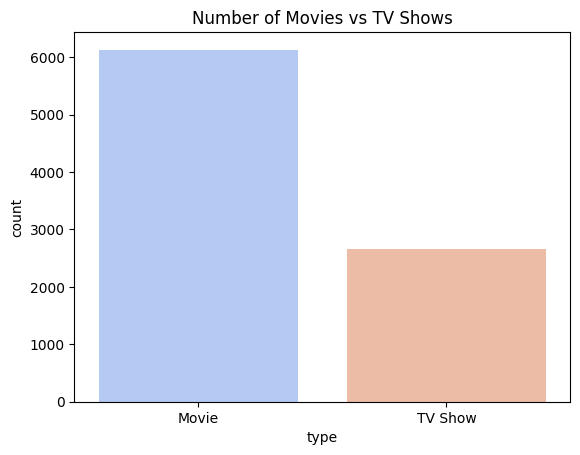

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='type', data=df, palette='coolwarm')
plt.title("Number of Movies vs TV Shows")
plt.show()


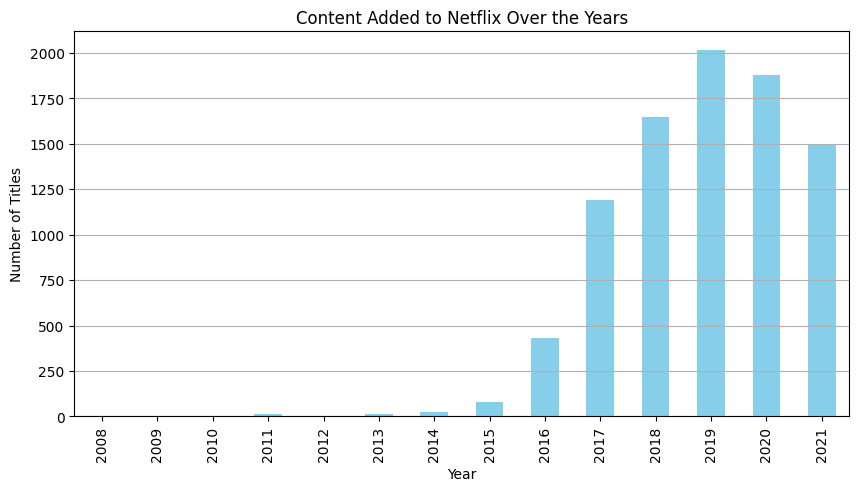

In [28]:
df['year_added'] = df['date_added'].dt.year

content_per_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
content_per_year.plot(kind='bar', color='skyblue')
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(axis='y')
plt.show()


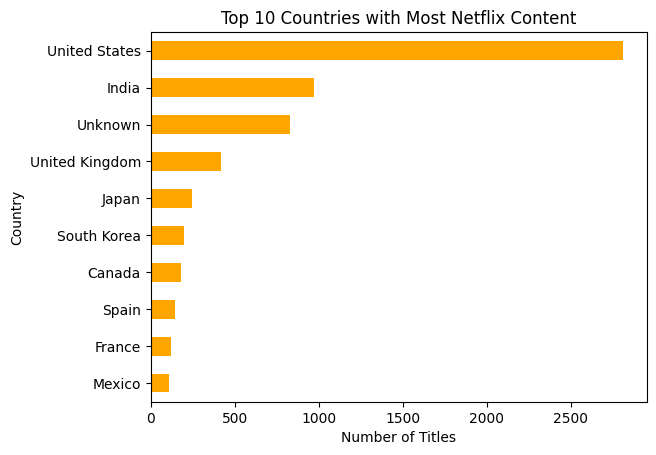

In [29]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='barh', color='orange')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.show()


/tmp/ipython-input-30-226208792.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genres_df, x='Count', y='Genre', palette='viridis')


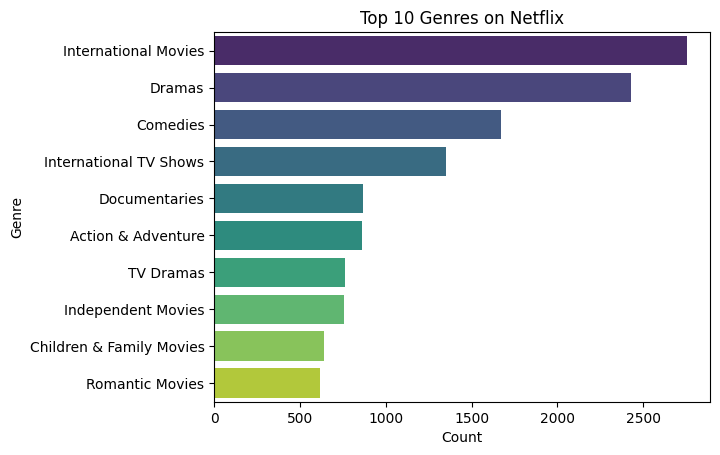

In [30]:
from collections import Counter

# Split genres and count
genres = df['listed_in'].str.split(', ')
all_genres = [genre for sublist in genres for genre in sublist]
genre_counts = Counter(all_genres).most_common(10)

# Plot
genres_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])
sns.barplot(data=genres_df, x='Count', y='Genre', palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.show()


# Task
Analyze the trend of content added over time by extracting the month and year from the `date_added` column, grouping the data by year, month, and type, and counting the number of titles in each group. Finally, visualize the data using a time series plot to show the number of movies and TV shows added over time.

## Extract month and year

### Subtask:
Create new columns for the month and year from the `date_added` column.


**Reasoning**:
Extract the year and month from the `date_added` column and store them in new columns.



In [31]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


## Group and count

### Subtask:
Group the data by year, month, and type, and count the number of titles in each group.


**Reasoning**:
Group the data by year, month, and type, count the titles, and reset the index.



In [32]:
content_trend = df.groupby(['year_added', 'month_added', 'type']).size().reset_index(name='title_count')
display(content_trend.head())

,year_added,month_added,type,title_count
0,2008,1,Movie,1
1,2008,2,TV Show,1
2,2009,5,Movie,1
3,2009,11,Movie,1
4,2010,11,Movie,1


## Visualize the data

### Subtask:
Create a time series plot to show the number of movies and TV shows added over time.


**Reasoning**:
Create a time series plot to visualize the number of movies and TV shows added over time.



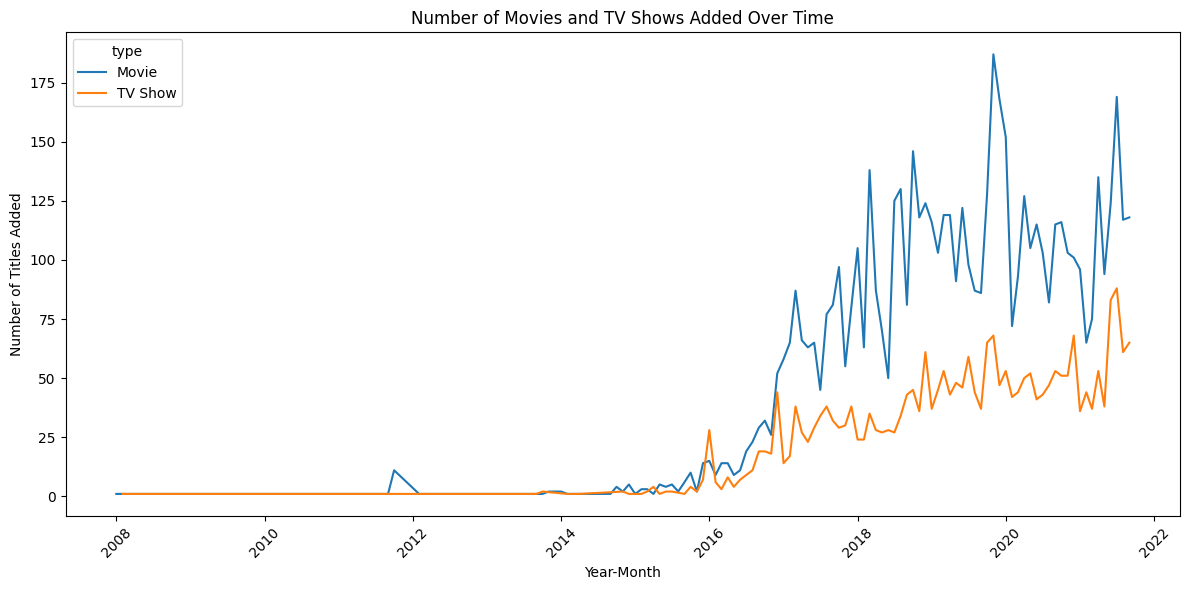

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create 'year_month' column for plotting
content_trend['year_month'] = pd.to_datetime(content_trend['year_added'].astype(str) + '-' + content_trend['month_added'].astype(str))

# Sort by 'year_month'
content_trend = content_trend.sort_values('year_month')

# Create the time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_trend, x='year_month', y='title_count', hue='type')

# Add title and labels
plt.title('Number of Movies and TV Shows Added Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Titles Added')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The number of both movies and TV shows added to the platform has generally increased over the years, showing a clear growth trend in content availability.
*   The plot indicates a significant increase in the rate of content addition, particularly for movies, starting around 2015-2016.

### Insights or Next Steps

*   Further analysis could investigate potential reasons for the content growth acceleration, such as expansion into new markets or increased production/licensing efforts.
*   Analyzing the content trend alongside subscriber growth or viewing data could provide insights into the relationship between content availability and user engagement.
